fatal: destination path 'openvino' already exists and is not an empty directory.
Defaulting to user installation because normal site-packages is not writeable
Train data: (60000, 28, 28)
Test data: (10000, 28, 28)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5

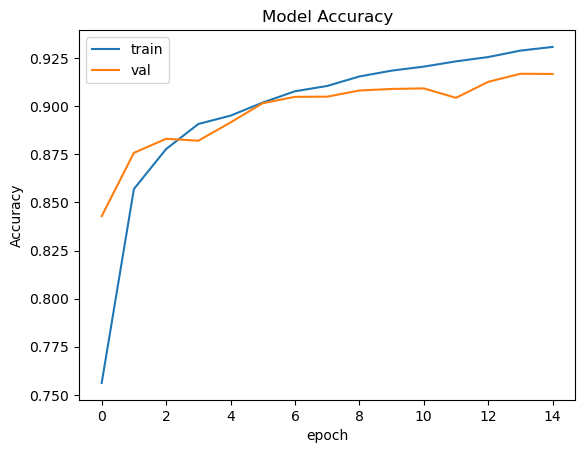

313/313 [==============================] - 2s 6ms/step
predictions: [9 2 1 ... 8 1 5]
prediction  target
9 9
2 2
1 1
1 1
6 6
1 1
4 4
6 6
5 5
7 7
4 4
5 5
7 7
3 3
4 4
1 1
2 2
4 4
8 8
0 0
2 2
5 5
7 7
5 9
1 1
2 4
6 6
0 0
9 9
3 3
8 8
8 8
3 3
3 3
8 8
0 0
7 7
5 5
7 7
9 9
6 6
1 1
6 3
9 7
6 6
7 7
2 2
1 1
2 2
6 2
Confusion Matrix:
[[845   0  22  23   1   2 102   0   5   0]
 [  0 984   0  10   1   0   4   0   1   0]
 [ 15   0 890   7  32   0  56   0   0   0]
 [  8   3   8 931  25   0  24   0   1   0]
 [  0   1  51  25 857   0  66   0   0   0]
 [  0   0   0   0   0 980   0  11   0   9]
 [ 87   2  75  21  38   0 769   0   8   0]
 [  0   0   0   0   0   5   0 974   0  21]
 [  1   0   9   2   2   2  11   3 968   2]
 [  0   0   0   0   0   4   0  26   0 970]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.84      0.89      0.87      1000
     

2023-07-14 10:44:51.384107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,13,13,32]
	 [[{{node inputs}}]]
2023-07-14 10:44:51.395761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,5,5,64]
	 [[{{node inputs}}]]
2023-07-14 10:44:51.413991: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,256]
	 [[{{node inputs}}]]
2023-07-

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


/bin/bash: mo: command not found


In [15]:
!git clone https://github.com/openvinotoolkit/openvino

!python3 -m pip install openvino-dev

import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

#import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plb
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

#load fashion MNIST dataset
fashion_mnist=keras.datasets.fashion_mnist
#load and preprocess data
(traind,trainl),(testd,testl)=fashion_mnist.load_data()
#printing details of the dataset
print("Train data:",traind.shape)
print("Test data:",testd.shape)

#scaling the pixel values
traind=traind/255.0
testd=testd/255.0

model = keras.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='leaky_relu'))

# Flatten the feature maps
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

#compiling the model 
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#training the model
history=model.fit(traind, trainl, epochs=15, batch_size=150, verbose=1, validation_data=(testd, testl))
#evaluating the model
test_loss,test_accuracy = model.evaluate(testd,testl,verbose = 0)
print("Test accuracy:",test_accuracy)

# Accuracy vs Epoch plot
plb.plot(history.history['accuracy'])
plb.plot(history.history['val_accuracy'])
plb.title('Model Accuracy')
plb.ylabel('Accuracy')
plb.xlabel('epoch')
plb.legend(['train', 'val','test'], loc='upper left')
plb.show()

# Save the model
model.save("model.h5")

# Make predictions
predictions = model.predict(testd)
predicted_labels=np.argmax(predictions, axis=1)
print("predictions:",predicted_labels)

#printing the predictions 
print("prediction  target")
for x in np.arange(50):
    print(predicted_labels[x],testl[x])

cm = confusion_matrix(testl, predicted_labels)

# Calculate classification report
report = classification_report(testl, predicted_labels)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

import tensorflow as tf
model = tf.keras.models.load_model('model.h5')
tf.saved_model.save(model,'model')

!mo --saved_model_dir model